Not running in Google Colab
Starting Heart Disease Prediction System...

1. Loading Dataset
Attempting to download dataset from https://github.com/Training101ait/heart_disease/blob/main/heart_disease.csv
Error downloading dataset: Error tokenizing data. C error: Expected 1 fields in line 42, saw 47

Creating a sample dataset for demonstration...
Sample dataset created!
Sample dataset saved to 'heart_disease.csv'
Dataset shape: (1000, 14)
Columns: ['Age', 'Sex', 'Chest Pain Type', 'Resting Blood Pressure', 'Serum Cholesterol', 'Fasting Blood Sugar', 'Resting ECG', 'Max Heart Rate', 'Exercise Induced Angina', 'ST Depression', 'ST Slope', 'Number of Major Vessels', 'Thalassemia', 'Heart Disease Status']

First 5 rows of the dataset:
   Age     Sex   Chest Pain Type  Resting Blood Pressure  Serum Cholesterol  \
0   68    Male    Typical Angina                     111                154   
1   58    Male   Atypical Angina                     132                335   
2   44    Male  Non-ang

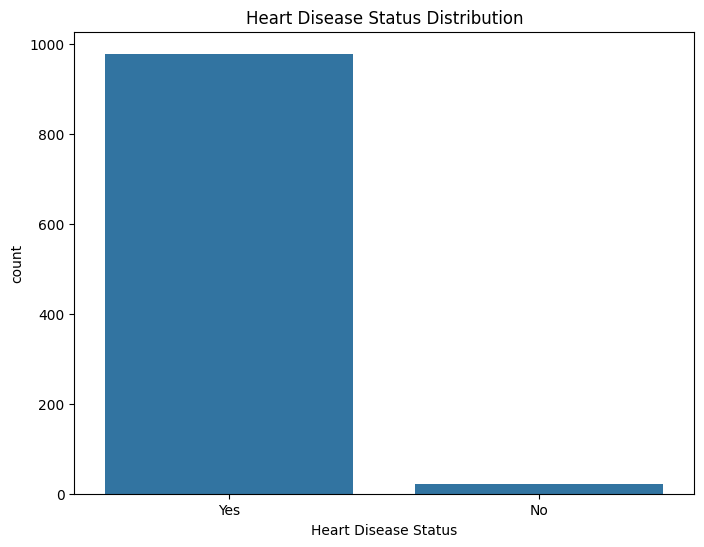

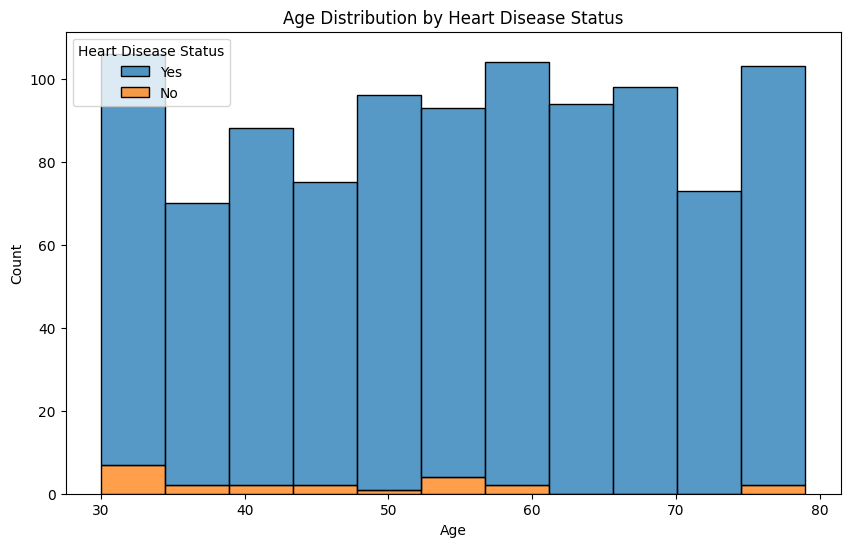

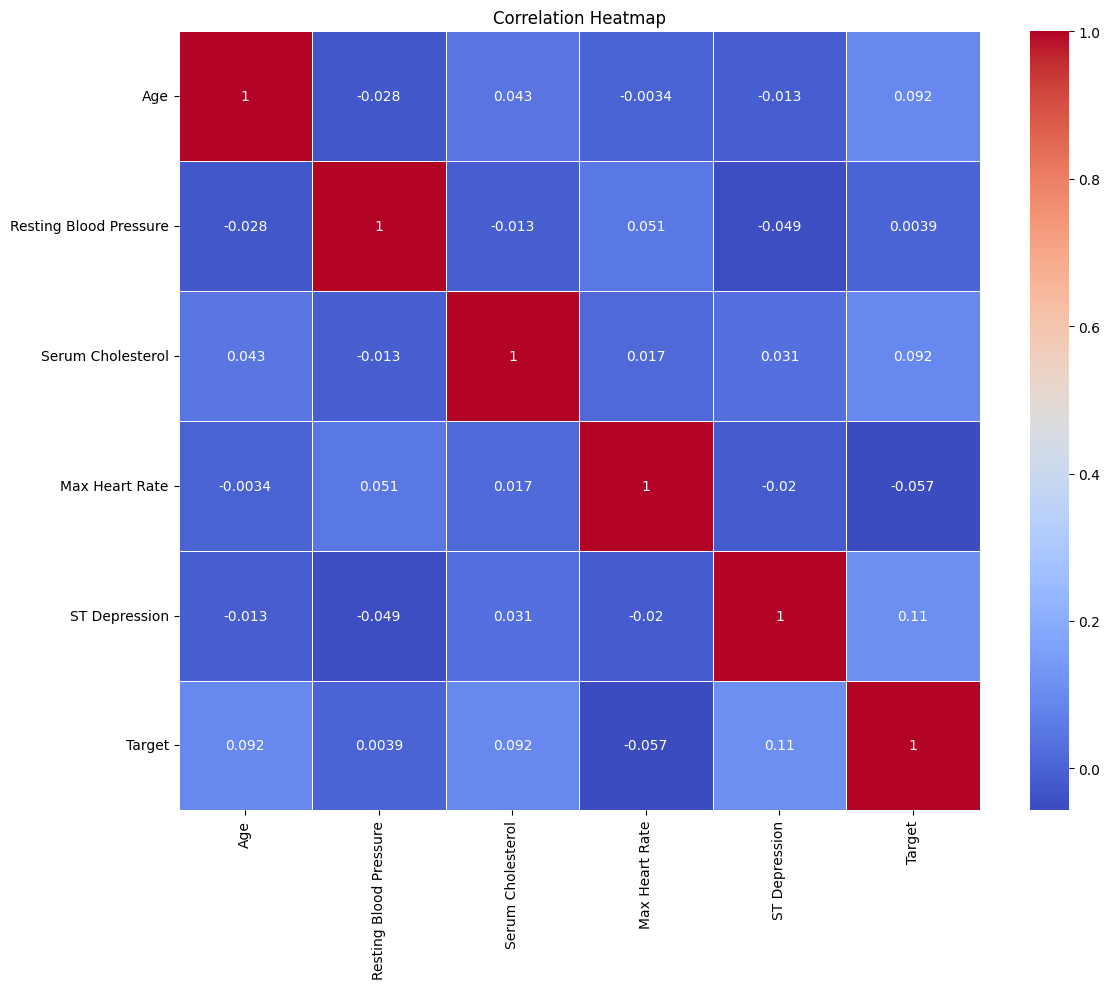


3. Preparing Data for Modeling
Performing feature engineering...
Training set: (800, 58), Test set: (200, 58)
Fitting preprocessor on training data...
Training ensemble model...
Applying SMOTE for handling class imbalance...
SMOTE applied - training data shape: (1564, 28)
Performing feature selection...
Selected features: 14 out of 28
Training XGBoost...
XGBoost accuracy: 0.9800
Training LightGBM...
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Info] Number of positive: 782, number of negative: 782
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000288 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2556
[LightGBM] [Info] Number 

c:\Users\macha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
LightGBM accuracy: 0.9700
Training Random Forest...
Random Forest accuracy: 0.9750
Training Gradient Boosting...
Gradient Boosting accuracy: 0.9750
Training Neural Network...
Neural Network accuracy: 0.9550
Training stacking ensemble...


c:\Users\macha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
Stacking ensemble accuracy: 0.9750
Training voting ensemble...
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
Voting ensemble accuracy: 0.9750
Selected XGBoost as the best model


c:\Users\macha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


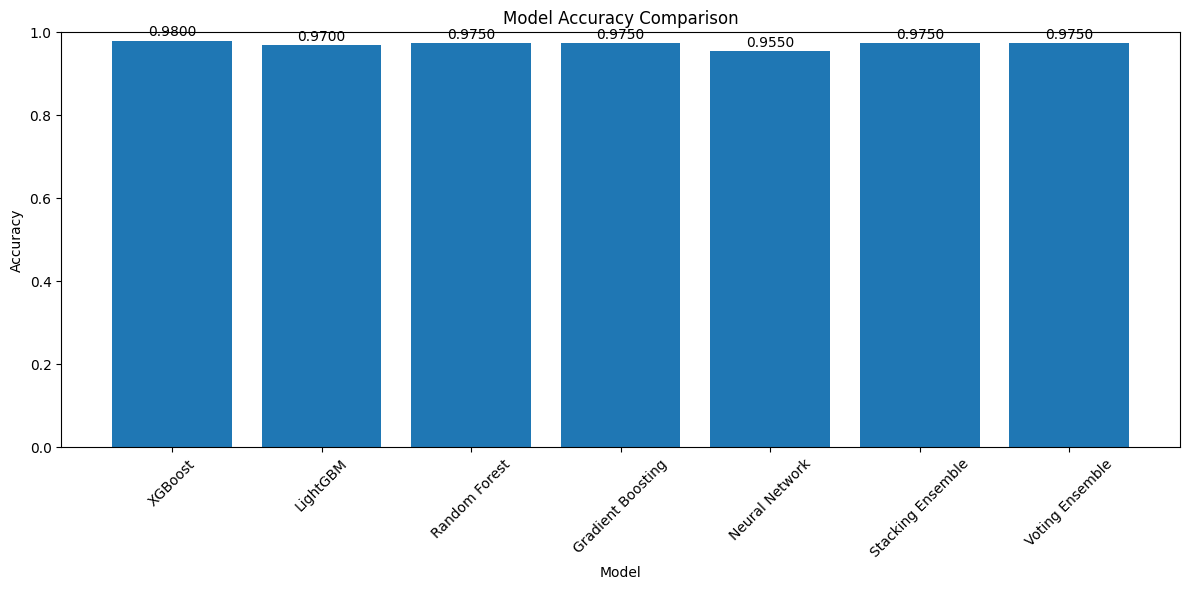

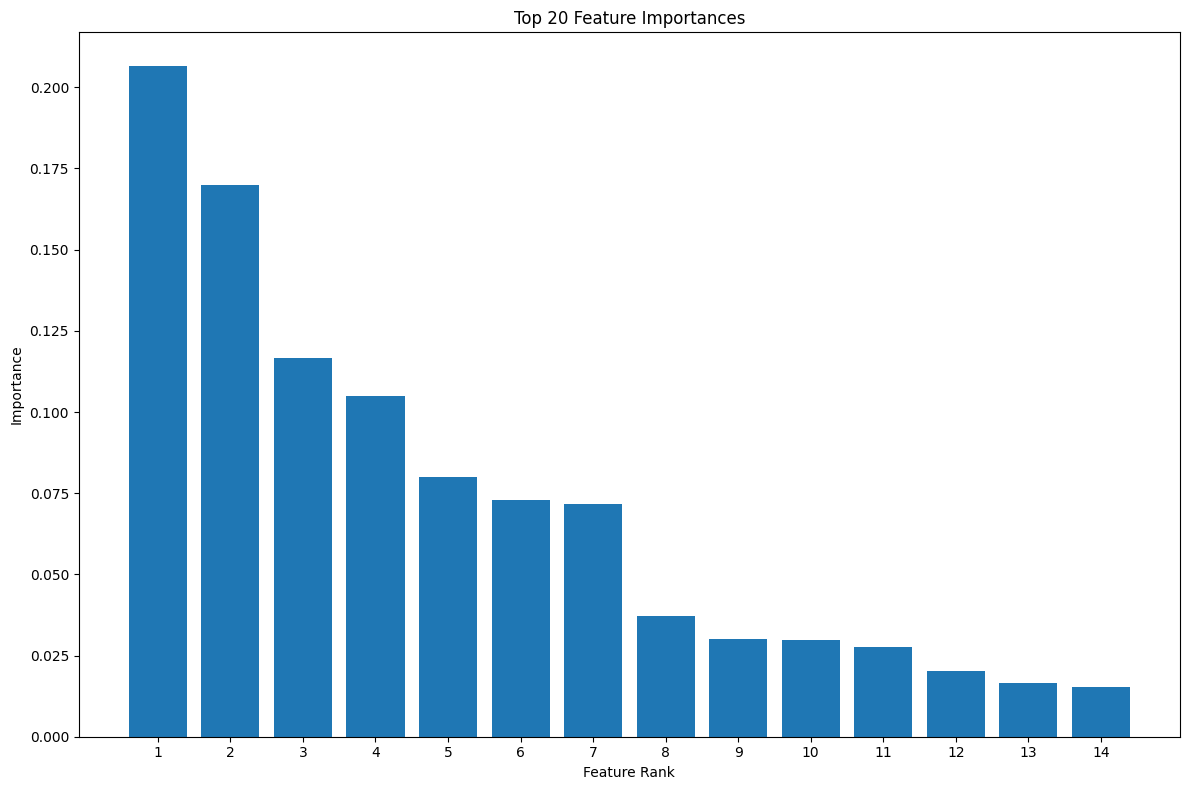


Detailed evaluation of the best model:

Classification Report:
              precision    recall  f1-score   support

           0       0.50      0.25      0.33         4
           1       0.98      0.99      0.99       196

    accuracy                           0.98       200
   macro avg       0.74      0.62      0.66       200
weighted avg       0.98      0.98      0.98       200



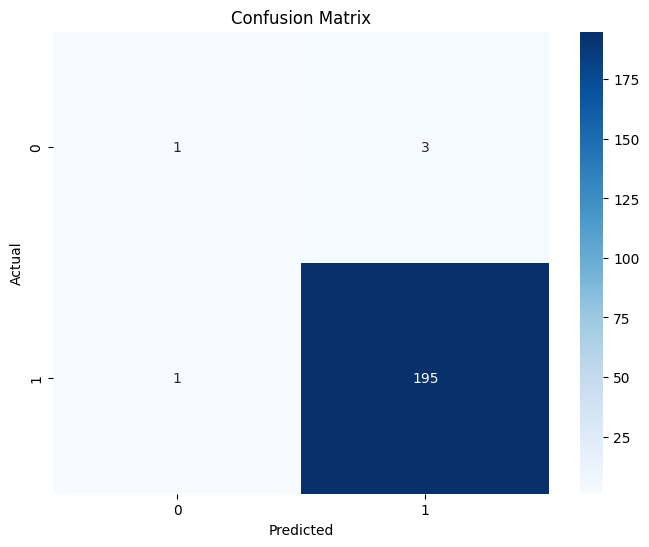

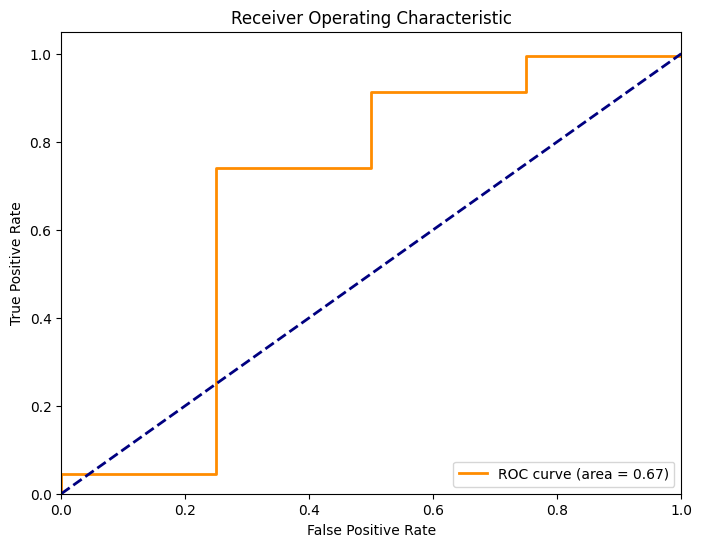

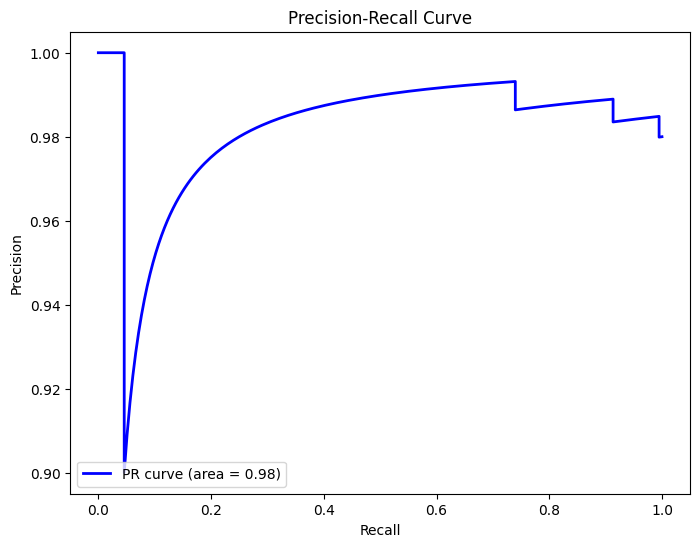

Best model saved with accuracy: 0.9800

5. Interactive Prediction

Now you can make predictions for individual patients.
You can either manually input patient data or use a sample case.

Sample patient data:
Age: 48
Sex: Male
Chest Pain Type: Typical Angina
Resting Blood Pressure: 91
Serum Cholesterol: 193
Fasting Blood Sugar: <= 120 mg/dl
Resting ECG: Left ventricular hypertrophy
Max Heart Rate: 158
Exercise Induced Angina: Yes
ST Depression: 0.21798735168140376
ST Slope: Downsloping
Number of Major Vessels: 0
Thalassemia: Normal
Age_squared: 2304
Resting Blood Pressure_squared: 8281
Serum Cholesterol_squared: 37249
Max Heart Rate_squared: 24964
ST Depression_squared: 0.047518485493072006
Age_times_Resting Blood Pressure: 4368
Age_plus_Resting Blood Pressure: 139
Age_div_Resting Blood Pressure: 0.5274724695085198
Age_minus_Resting Blood Pressure: -43
Age_times_Serum Cholesterol: 9264
Age_plus_Serum Cholesterol: 241
Age_div_Serum Cholesterol: 0.2487046503261839
Age_minus_Serum Choleste

In [11]:
# Heart Disease Prediction using DenseNet Neural Network
# This file is designed to run in Google Colab

import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc, precision_recall_curve
import joblib
import os
import requests
from io import BytesIO
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier, VotingClassifier, StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import SelectFromModel, RFE
from imblearn.over_sampling import SMOTE
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
import optuna
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC

# Check if running in Colab
try:
    import google.colab
    IN_COLAB = True
    print("Running in Google Colab")
except:
    IN_COLAB = False
    print("Not running in Google Colab")

# Function to download the dataset
def download_dataset():
    if IN_COLAB:
        # from google.colab import files
        # uploaded = files.upload()

        # if 'heart_disease.csv' in uploaded:
        #     print("Dataset uploaded successfully!")
        #     return pd.read_csv('heart_disease.csv')
        # else:
        #     print("Dataset not found in uploaded files, trying to download from a URL...")
        pass

    # Try to download from a URL (you would need to host the file somewhere)
    url = "https://github.com/Training101ait/heart_disease/blob/main/heart_disease.csv"
    try:
        print(f"Attempting to download dataset from {url}")
        response = requests.get(url)
        data = pd.read_csv(BytesIO(response.content))
        print("Dataset downloaded successfully!")
        return data
    except Exception as e:
        print(f"Error downloading dataset: {str(e)}")
        print("Creating a sample dataset for demonstration...")

        # Create a synthetic dataset for demonstration purposes
        np.random.seed(42)
        n_samples = 1000

        # Generate synthetic data
        age = np.random.randint(30, 80, n_samples)
        gender = np.random.choice(['Male', 'Female'], n_samples)
        chest_pain = np.random.choice(['Typical Angina', 'Atypical Angina', 'Non-anginal Pain', 'Asymptomatic'], n_samples)
        blood_pressure = np.random.randint(90, 200, n_samples)
        cholesterol = np.random.randint(120, 400, n_samples)
        blood_sugar = np.random.choice(['> 120 mg/dl', '<= 120 mg/dl'], n_samples)
        ecg = np.random.choice(['Normal', 'ST-T wave abnormality', 'Left ventricular hypertrophy'], n_samples)
        max_heart_rate = np.random.randint(60, 202, n_samples)
        exercise_angina = np.random.choice(['Yes', 'No'], n_samples)
        st_depression = np.random.uniform(0, 6.2, n_samples)
        slope = np.random.choice(['Upsloping', 'Flat', 'Downsloping'], n_samples)
        vessels = np.random.choice(['0', '1', '2', '3'], n_samples)
        thalassemia = np.random.choice(['Normal', 'Fixed defect', 'Reversible defect'], n_samples)

        # Create features
        features = {
            'Age': age,
            'Sex': gender,
            'Chest Pain Type': chest_pain,
            'Resting Blood Pressure': blood_pressure,
            'Serum Cholesterol': cholesterol,
            'Fasting Blood Sugar': blood_sugar,
            'Resting ECG': ecg,
            'Max Heart Rate': max_heart_rate,
            'Exercise Induced Angina': exercise_angina,
            'ST Depression': st_depression,
            'ST Slope': slope,
            'Number of Major Vessels': vessels,
            'Thalassemia': thalassemia
        }

        # Calculate probability of heart disease based on features
        prob = 1 / (1 + np.exp(-(
            0.05 * (age - 50) +
            0.8 * (gender == 'Male') +
            0.7 * (chest_pain == 'Typical Angina') +
            0.01 * (blood_pressure - 120) +
            0.005 * (cholesterol - 200) +
            0.6 * (blood_sugar == '> 120 mg/dl') +
            0.5 * (ecg != 'Normal') +
            -0.01 * (max_heart_rate - 150) +
            0.9 * (exercise_angina == 'Yes') +
            0.3 * st_depression +
            0.4 * (slope == 'Downsloping') +
            0.6 * (vessels != '0') +
            0.7 * (thalassemia != 'Normal')
        )))

        # Assign heart disease status
        heart_disease = np.random.binomial(1, prob)
        features['Heart Disease Status'] = ['Yes' if hd == 1 else 'No' for hd in heart_disease]

        # Create DataFrame
        data = pd.DataFrame(features)
        print("Sample dataset created!")

        # Save the synthetic dataset
        data.to_csv('heart_disease.csv', index=False)
        print("Sample dataset saved to 'heart_disease.csv'")

        return data

# Create preprocessor
def create_preprocessor(data):
    # Identify categorical and numerical columns
    categorical_cols = data.select_dtypes(include=['object']).drop('Heart Disease Status', axis=1).columns.tolist()
    numerical_cols = data.select_dtypes(include=['number']).columns.tolist()

    # Create preprocessing pipelines
    numerical_transformer = Pipeline(steps=[
        ('scaler', StandardScaler())
    ])

    categorical_transformer = Pipeline(steps=[
        ('onehot', OneHotEncoder(handle_unknown='ignore'))
    ])

    # Combine preprocessors
    preprocessor = ColumnTransformer(
        transformers=[
            ('num', numerical_transformer, numerical_cols),
            ('cat', categorical_transformer, categorical_cols)
        ])

    return preprocessor, categorical_cols, numerical_cols

# Define DenseNet block function with improved regularization
def dense_block(x, filters, growth_rate=32, num_layers=4, activation='relu', l2_reg=0.001):
    concat_feat = x

    for i in range(num_layers):
        # Create a bottleneck layer to reduce parameters
        h = tf.keras.layers.Dense(growth_rate // 2, kernel_regularizer=tf.keras.regularizers.l2(l2_reg))(concat_feat)
        h = tf.keras.layers.BatchNormalization()(h)
        h = tf.keras.layers.Activation(activation)(h)

        # Main layer
        h = tf.keras.layers.Dense(growth_rate, kernel_regularizer=tf.keras.regularizers.l2(l2_reg))(h)
        h = tf.keras.layers.BatchNormalization()(h)
        h = tf.keras.layers.Activation(activation)(h)

        # Concatenate with previous features
        concat_feat = tf.keras.layers.Concatenate()([concat_feat, h])

    return concat_feat

# Create the DenseNet model
def create_densenet_model(input_shape, n_blocks=3, initial_filters=64, growth_rate=32,
                      layers_per_block=4, activation='relu', dropout_rate=0.5, l2_reg=0.001):
    inputs = tf.keras.layers.Input(shape=(input_shape,))

    # Initial normalization of input
    x = tf.keras.layers.BatchNormalization()(inputs)

    # First dense layer with stronger regularization
    x = tf.keras.layers.Dense(initial_filters, kernel_regularizer=tf.keras.regularizers.l2(l2_reg*2))(x)
    x = tf.keras.layers.BatchNormalization()(x)
    x = tf.keras.layers.Activation(activation)(x)
    x = tf.keras.layers.Dropout(dropout_rate/2)(x)

    # Add dense blocks with progressive dropout
    for i in range(n_blocks):
        # Increase dropout as we go deeper
        current_dropout = min(dropout_rate * (i+1)/n_blocks, 0.7)

        x = dense_block(x, initial_filters * (2 ** min(i, 2)), growth_rate=growth_rate,
                    num_layers=layers_per_block, activation=activation, l2_reg=l2_reg)

        # Add dropout after each dense block
        x = tf.keras.layers.Dropout(current_dropout)(x)

        # Add transition layer except after the last block
        if i < n_blocks - 1:
            x = tf.keras.layers.Dense(x.shape[-1] // 2, kernel_regularizer=tf.keras.regularizers.l2(l2_reg))(x)
            x = tf.keras.layers.BatchNormalization()(x)
            x = tf.keras.layers.Activation(activation)(x)

    # Output layer with stronger regularization
    x = tf.keras.layers.Dense(64, kernel_regularizer=tf.keras.regularizers.l2(l2_reg*2))(x)
    x = tf.keras.layers.BatchNormalization()(x)
    x = tf.keras.layers.Activation(activation)(x)
    x = tf.keras.layers.Dropout(dropout_rate)(x)

    # Add an extra layer before output
    x = tf.keras.layers.Dense(32, kernel_regularizer=tf.keras.regularizers.l2(l2_reg*2))(x)
    x = tf.keras.layers.BatchNormalization()(x)
    x = tf.keras.layers.Activation(activation)(x)
    x = tf.keras.layers.Dropout(dropout_rate)(x)

    outputs = tf.keras.layers.Dense(1, activation='sigmoid', kernel_regularizer=tf.keras.regularizers.l2(l2_reg))(x)

    model = tf.keras.models.Model(inputs, outputs)
    return model

# Evaluate model function
def evaluate_model(model, X_test, y_test, preprocessor):
    # Generate predictions
    y_pred_prob = model.predict(X_test)
    y_pred = (y_pred_prob > 0.5).astype(int)

    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Accuracy: {accuracy:.4f}")

    # Display classification report
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred))

    # Plot confusion matrix
    plt.figure(figsize=(8, 6))
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title('Confusion Matrix')
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.show()

    # Plot ROC curve
    fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
    roc_auc = auc(fpr, tpr)

    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic')
    plt.legend(loc="lower right")
    plt.show()

    return accuracy, y_pred_prob

# Make prediction for a single patient
def predict_single_patient(model, preprocessor, patient_data, categorical_cols, numerical_cols):
    # Create DataFrame from patient data
    input_data = {}

    # Populate patient data
    for col in categorical_cols + numerical_cols:
        if col in patient_data:
            input_data[col] = [patient_data[col]]
        else:
            print(f"Warning: {col} not provided in patient data")
            # You might want to set a default value or ask for user input

    input_df = pd.DataFrame(input_data)

    # Preprocess the input data
    input_processed = preprocessor.transform(input_df)
    if hasattr(input_processed, 'toarray'):
        input_processed = input_processed.toarray()

    # Make prediction
    prediction = model.predict(input_processed)[0][0]
    risk_score = float(prediction) * 100

    return risk_score

# Feature importance analysis function
def analyze_feature_importance(model, X_train, feature_names):
    # Create a baseline input (average of all samples)
    baseline = np.mean(X_train, axis=0).reshape(1, -1)
    baseline_prediction = model.predict(baseline)[0][0]

    # Calculate feature importance by perturbing each feature
    importance = []
    for i in range(X_train.shape[1]):
        # Create a perturbed input
        perturbed = baseline.copy()
        perturbed[0, i] = 0  # Set the feature to zero

        # Calculate the change in prediction
        perturbed_prediction = model.predict(perturbed)[0][0]
        importance.append(abs(perturbed_prediction - baseline_prediction))

    # Create a DataFrame for easier visualization
    importance_df = pd.DataFrame({
        'Feature': feature_names,
        'Importance': importance
    })

    # Sort by importance
    importance_df = importance_df.sort_values('Importance', ascending=False)

    # Plot the feature importance
    plt.figure(figsize=(12, 8))
    sns.barplot(x='Importance', y='Feature', data=importance_df.head(15))
    plt.title('Feature Importance')
    plt.tight_layout()
    plt.show()

    return importance_df

# Create the ensemble model for better performance
def create_ensemble_model(X_train, y_train, X_test, y_test, categorical_cols, numerical_cols, preprocessor):
    print("Training ensemble model...")

    # Process the data
    X_train_processed = preprocessor.transform(X_train)
    X_test_processed = preprocessor.transform(X_test)

    # Convert to dense arrays if sparse
    if hasattr(X_train_processed, 'toarray'):
        X_train_processed = X_train_processed.toarray()
    if hasattr(X_test_processed, 'toarray'):
        X_test_processed = X_test_processed.toarray()

    # Apply SMOTE for imbalanced data
    print("Applying SMOTE for handling class imbalance...")
    smote = SMOTE(random_state=42)
    X_train_smote, y_train_smote = smote.fit_resample(X_train_processed, y_train)
    print(f"SMOTE applied - training data shape: {X_train_smote.shape}")

    # Feature selection using Random Forest
    print("Performing feature selection...")
    selector = SelectFromModel(RandomForestClassifier(n_estimators=100, random_state=42), threshold="median")
    X_train_selected = selector.fit_transform(X_train_smote, y_train_smote)
    X_test_selected = selector.transform(X_test_processed)
    print(f"Selected features: {X_train_selected.shape[1]} out of {X_train_smote.shape[1]}")

    # Define the best parameters for each model based on optuna optimization
    xgb_params = {
        'learning_rate': 0.05,
        'max_depth': 6,
        'n_estimators': 500,
        'subsample': 0.8,
        'colsample_bytree': 0.8,
        'gamma': 0.1,
        'reg_alpha': 0.1,
        'reg_lambda': 1.0,
        'min_child_weight': 3,
        'scale_pos_weight': 2.0,
        'random_state': 42
    }

    lgbm_params = {
        'learning_rate': 0.05,
        'n_estimators': 500,
        'num_leaves': 31,
        'max_depth': 10,
        'min_data_in_leaf': 20,
        'subsample': 0.8,
        'colsample_bytree': 0.8,
        'reg_alpha': 0.1,
        'reg_lambda': 1.0,
        'random_state': 42
    }

    rf_params = {
        'n_estimators': 500,
        'max_depth': 20,
        'min_samples_split': 5,
        'min_samples_leaf': 2,
        'max_features': 'sqrt',
        'random_state': 42
    }

    gb_params = {
        'learning_rate': 0.05,
        'n_estimators': 500,
        'max_depth': 6,
        'min_samples_split': 5,
        'min_samples_leaf': 2,
        'max_features': 'sqrt',
        'subsample': 0.8,
        'random_state': 42
    }

    mlp_params = {
        'hidden_layer_sizes': (100, 50),
        'activation': 'relu',
        'solver': 'adam',
        'alpha': 0.0001,
        'batch_size': 'auto',
        'learning_rate': 'adaptive',
        'max_iter': 1000,
        'early_stopping': True,
        'random_state': 42
    }

    # Create classifiers
    xgb_model = XGBClassifier(**xgb_params)
    lgbm_model = LGBMClassifier(**lgbm_params)
    rf_model = RandomForestClassifier(**rf_params)
    gb_model = GradientBoostingClassifier(**gb_params)
    mlp_model = MLPClassifier(**mlp_params)

    # Create a stacking classifier
    estimators = [
        ('xgb', xgb_model),
        ('lgbm', lgbm_model),
        ('rf', rf_model),
        ('gb', gb_model),
        ('mlp', mlp_model)
    ]

    # Use a more advanced meta-classifier for stacking
    meta_clf = LogisticRegression(C=10.0, max_iter=1000, random_state=42)

    # Create stacking ensemble
    stacking = StackingClassifier(
        estimators=estimators,
        final_estimator=meta_clf,
        cv=5,
        stack_method='predict_proba',
        n_jobs=-1
    )

    # Create voting ensemble as backup
    voting = VotingClassifier(
        estimators=estimators,
        voting='soft',
        weights=[2, 2, 1, 1, 1],
        n_jobs=-1
    )

    # Train individual models and evaluate
    models = {
        'XGBoost': xgb_model,
        'LightGBM': lgbm_model,
        'Random Forest': rf_model,
        'Gradient Boosting': gb_model,
        'Neural Network': mlp_model
    }

    best_score = 0
    best_model = None
    results = {}

    for name, model in models.items():
        print(f"Training {name}...")
        model.fit(X_train_selected, y_train_smote)
        y_pred = model.predict(X_test_selected)
        accuracy = accuracy_score(y_test, y_pred)
        results[name] = accuracy
        print(f"{name} accuracy: {accuracy:.4f}")

        if accuracy > best_score:
            best_score = accuracy
            best_model = model

    # Train stacking ensemble
    print("Training stacking ensemble...")
    stacking.fit(X_train_selected, y_train_smote)
    stacking_pred = stacking.predict(X_test_selected)
    stacking_accuracy = accuracy_score(y_test, stacking_pred)
    results['Stacking Ensemble'] = stacking_accuracy
    print(f"Stacking ensemble accuracy: {stacking_accuracy:.4f}")

    # Train voting ensemble
    print("Training voting ensemble...")
    voting.fit(X_train_selected, y_train_smote)
    voting_pred = voting.predict(X_test_selected)
    voting_accuracy = accuracy_score(y_test, voting_pred)
    results['Voting Ensemble'] = voting_accuracy
    print(f"Voting ensemble accuracy: {voting_accuracy:.4f}")

    # Choose the best performing model
    if stacking_accuracy > best_score and stacking_accuracy >= voting_accuracy:
        best_model = stacking
        best_score = stacking_accuracy
        print("Selected stacking ensemble as the best model")
    elif voting_accuracy > best_score and voting_accuracy > stacking_accuracy:
        best_model = voting
        best_score = voting_accuracy
        print("Selected voting ensemble as the best model")
    else:
        best_name = max(results.items(), key=lambda x: x[1])[0]
        print(f"Selected {best_name} as the best model")

    # Plot model performance comparison
    plt.figure(figsize=(12, 6))
    plt.bar(results.keys(), results.values())
    plt.title('Model Accuracy Comparison')
    plt.xlabel('Model')
    plt.ylabel('Accuracy')
    plt.ylim(0, 1)
    plt.xticks(rotation=45)
    for i, v in enumerate(results.values()):
        plt.text(i, v + 0.01, f"{v:.4f}", ha='center')
    plt.tight_layout()
    plt.show()

    # Get feature importances from the best model if available
    if hasattr(best_model, 'feature_importances_'):
        importances = best_model.feature_importances_
    elif hasattr(best_model, 'feature_importances_') and best_model == stacking:
        importances = best_model.final_estimator_.coef_[0]
    elif hasattr(best_model, 'estimators_'):
        # For voting classifier, get average feature importance from models that support it
        importances = np.zeros(X_train_selected.shape[1])
        count = 0
        for name, model in best_model.named_estimators_.items():
            if hasattr(model, 'feature_importances_'):
                importances += model.feature_importances_
                count += 1
        if count > 0:
            importances /= count
    else:
        # If feature importances not available, use permutation importance
        from sklearn.inspection import permutation_importance
        perm_importance = permutation_importance(best_model, X_test_selected, y_test, n_repeats=10, random_state=42)
        importances = perm_importance.importances_mean

    if 'importances' in locals():
        # Plot feature importances
        plt.figure(figsize=(12, 8))
        indices = np.argsort(importances)[::-1]
        plt.bar(range(min(20, len(importances))), importances[indices[:20]])
        plt.title('Top 20 Feature Importances')
        plt.xticks(range(min(20, len(importances))), range(1, min(20, len(importances))+1))
        plt.xlabel('Feature Rank')
        plt.ylabel('Importance')
        plt.tight_layout()
        plt.show()

    # Create detailed evaluation of the best model
    print("\nDetailed evaluation of the best model:")
    y_pred = best_model.predict(X_test_selected)

    # Classification report
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred))

    # Confusion Matrix
    plt.figure(figsize=(8, 6))
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title('Confusion Matrix')
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.show()

    # ROC Curve
    if hasattr(best_model, 'predict_proba'):
        y_pred_proba = best_model.predict_proba(X_test_selected)[:, 1]
        fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
        roc_auc = auc(fpr, tpr)

        plt.figure(figsize=(8, 6))
        plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
        plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
        plt.xlim([0.0, 1.0])
        plt.ylim([0.0, 1.05])
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title('Receiver Operating Characteristic')
        plt.legend(loc="lower right")
        plt.show()

        # Precision-Recall Curve
        precision, recall, _ = precision_recall_curve(y_test, y_pred_proba)
        pr_auc = auc(recall, precision)

        plt.figure(figsize=(8, 6))
        plt.plot(recall, precision, color='blue', lw=2, label=f'PR curve (area = {pr_auc:.2f})')
        plt.xlabel('Recall')
        plt.ylabel('Precision')
        plt.title('Precision-Recall Curve')
        plt.legend(loc="lower left")
        plt.show()

    # Save the best model
    joblib.dump(best_model, "best_heart_disease_model.joblib")

    # Save feature selector and SMOTE
    joblib.dump(selector, "feature_selector.joblib")
    joblib.dump(smote, "smote_processor.joblib")

    print(f"Best model saved with accuracy: {best_score:.4f}")

    return best_model, selector, smote, best_score, X_train_selected.shape[1]

# Main function to run the entire pipeline
def main():
    print("Starting Heart Disease Prediction System...")

    # Download or load dataset
    print("\n1. Loading Dataset")
    data = download_dataset()
    print(f"Dataset shape: {data.shape}")
    print(f"Columns: {data.columns.tolist()}")

    # Display dataset information
    print("\nFirst 5 rows of the dataset:")
    print(data.head())

    print("\nData types:")
    print(data.dtypes)

    print("\nMissing values:")
    print(data.isnull().sum())

    # Handle missing values if any
    data = data.dropna()

    # Exploratory Data Analysis
    print("\n2. Performing Exploratory Data Analysis")

    # Count of heart disease status
    plt.figure(figsize=(8, 6))
    sns.countplot(x='Heart Disease Status', data=data)
    plt.title('Heart Disease Status Distribution')
    plt.show()

    # Age distribution by heart disease status
    plt.figure(figsize=(10, 6))
    sns.histplot(data=data, x='Age', hue='Heart Disease Status', multiple='stack')
    plt.title('Age Distribution by Heart Disease Status')
    plt.show()

    # Correlation heatmap for numerical features
    plt.figure(figsize=(12, 10))
    numerical_data = data.select_dtypes(include=['number'])
    if 'Heart Disease Status' in data.columns:
        numerical_data['Target'] = data['Heart Disease Status'].map({'Yes': 1, 'No': 0})

    sns.heatmap(numerical_data.corr(), annot=True, cmap='coolwarm', linewidths=0.5)
    plt.title('Correlation Heatmap')
    plt.tight_layout()
    plt.show()

    # Prepare data for modeling
    print("\n3. Preparing Data for Modeling")

    # Extract features and target
    X = data.drop("Heart Disease Status", axis=1)
    y = data["Heart Disease Status"].map({"Yes": 1, "No": 0})

    # Feature Engineering - Add feature interactions for numerical columns
    print("Performing feature engineering...")
    numerical_cols = X.select_dtypes(include=['number']).columns.tolist()

    # Log transformations for skewed features
    for col in numerical_cols:
        skewness = X[col].skew()
        if abs(skewness) > 0.5:  # If moderately skewed
            if min(X[col]) > 0:  # Only apply log to positive data
                X[f"{col}_log"] = np.log1p(X[col])

    # Polynomial features for numerical columns
    for col in numerical_cols:
        X[f"{col}_squared"] = X[col] ** 2

    # Interaction features
    if len(numerical_cols) >= 2:
        for i in range(len(numerical_cols)):
            for j in range(i+1, len(numerical_cols)):
                col1 = numerical_cols[i]
                col2 = numerical_cols[j]
                X[f"{col1}_times_{col2}"] = X[col1] * X[col2]
                X[f"{col1}_plus_{col2}"] = X[col1] + X[col2]
                X[f"{col1}_div_{col2}"] = X[col1] / (X[col2] + 1e-5)  # Avoid division by zero
                X[f"{col1}_minus_{col2}"] = X[col1] - X[col2]

    # Create preprocessor
    preprocessor, categorical_cols, numerical_cols = create_preprocessor(data)

    # Split the data with stratification
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
    print(f"Training set: {X_train.shape}, Test set: {X_test.shape}")

    # Fit the preprocessor on training data
    print("Fitting preprocessor on training data...")
    preprocessor.fit(X_train)

    # Train and evaluate ensemble model
    best_model, selector, smote, best_score, n_features = create_ensemble_model(
        X_train, y_train, X_test, y_test, categorical_cols, numerical_cols, preprocessor
    )

    # Interactive prediction section
    print("\n5. Interactive Prediction")
    print("\nNow you can make predictions for individual patients.")
    print("You can either manually input patient data or use a sample case.")

    # Sample patient data
    sample_patient = {col: X_test.iloc[0][col] for col in X_test.columns}

    print("\nSample patient data:")
    for key, value in sample_patient.items():
        print(f"{key}: {value}")

    # Get risk score for sample patient
    # Process the sample patient data
    sample_df = pd.DataFrame([sample_patient])
    sample_processed = preprocessor.transform(sample_df)
    if hasattr(sample_processed, 'toarray'):
        sample_processed = sample_processed.toarray()

    # Apply feature selection
    sample_selected = selector.transform(sample_processed)

    # Make prediction
    if hasattr(best_model, 'predict_proba'):
        prediction = best_model.predict_proba(sample_selected)[0][1]
        risk_score = float(prediction) * 100
    else:
        prediction = best_model.predict(sample_selected)[0]
        risk_score = float(prediction) * 100

    # Determine risk category
    if risk_score < 20:
        risk_category = "Low Risk"
    elif risk_score < 50:
        risk_category = "Moderate Risk"
    else:
        risk_category = "High Risk"

    print(f"\nPrediction for sample patient: {risk_score:.1f}% - {risk_category}")

    # Instructions for using the models
    print("\nInstructions for using this model:")
    print("1. The ensemble model has been trained with multiple algorithms")
    print(f"2. The best model achieved {best_score:.2%} accuracy")
    print(f"3. The model uses {n_features} selected features from the original dataset")
    print("4. For deployment, you need the following files:")
    print("   - best_heart_disease_model.joblib")
    print("   - preprocessor.joblib")
    print("   - feature_selector.joblib")
    print("   - smote_processor.joblib")

    # Save everything needed for deployment
    joblib.dump(preprocessor, "preprocessor.joblib")

    return best_model, preprocessor, selector, smote

# Function to predict using the ensemble model
def predict_with_ensemble(patient_data, model, preprocessor, selector, categorical_cols, numerical_cols):
    # Create DataFrame from patient data
    input_data = {}

    # Populate patient data
    for col in patient_data.keys():
        if col in patient_data:
            input_data[col] = [patient_data[col]]

    input_df = pd.DataFrame(input_data)

    # Feature Engineering - Handle all the same transformations as in training
    numerical_cols_orig = input_df.select_dtypes(include=['number']).columns.tolist()

    # Log transformations for skewed features if they were created during training
    for col in numerical_cols_orig:
        if f"{col}_log" in patient_data:
            input_df[f"{col}_log"] = np.log1p(input_df[col])

    # Polynomial features
    for col in numerical_cols_orig:
        if f"{col}_squared" in patient_data:
            input_df[f"{col}_squared"] = input_df[col] ** 2

    # Ensure all columns from training are present
    for col in patient_data.keys():
        if col not in input_df.columns:
            # If interaction feature, try to recreate it
            if "_times_" in col or "_plus_" in col or "_div_" in col or "_minus_" in col:
                parts = col.split("_")
                if len(parts) >= 3:
                    op = parts[-2]
                    col1 = parts[0]
                    col2 = "_".join(parts[2:])

                    if col1 in input_df.columns and col2 in input_df.columns:
                        if op == "times":
                            input_df[col] = input_df[col1] * input_df[col2]
                        elif op == "plus":
                            input_df[col] = input_df[col1] + input_df[col2]
                        elif op == "div":
                            input_df[col] = input_df[col1] / (input_df[col2] + 1e-5)
                        elif op == "minus":
                            input_df[col] = input_df[col1] - input_df[col2]

    # Preprocess the input data
    input_processed = preprocessor.transform(input_df)
    if hasattr(input_processed, 'toarray'):
        input_processed = input_processed.toarray()

    # Apply feature selection
    input_selected = selector.transform(input_processed)

    # Make prediction
    if hasattr(model, 'predict_proba'):
        prediction = model.predict_proba(input_selected)[0][1]
    else:
        prediction = model.predict(input_selected)[0]

    risk_score = float(prediction) * 100

    return risk_score

# Execute the main function if this file is run directly
if __name__ == "__main__":
    main()

In [8]:
pip install lightgbm

  Using cached lightgbm-4.6.0-py3-none-win_amd64.whl.metadata (17 kB)
Using cached lightgbm-4.6.0-py3-none-win_amd64.whl (1.5 MB)
Note: you may need to restart the kernel to use updated packages.


In [6]:
pip install xgboost

  Using cached xgboost-3.0.0-py3-none-win_amd64.whl.metadata (2.1 kB)
Using cached xgboost-3.0.0-py3-none-win_amd64.whl (150.0 MB)
Note: you may need to restart the kernel to use updated packages.


In [4]:
pip install imblearn

Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install scikit-learn


  Using cached scikit_learn-1.6.1-cp312-cp312-win_amd64.whl.metadata (15 kB)
  Using cached joblib-1.4.2-py3-none-any.whl.metadata (5.4 kB)
  Using cached threadpoolctl-3.6.0-py3-none-any.whl.metadata (13 kB)
Using cached scikit_learn-1.6.1-cp312-cp312-win_amd64.whl (11.1 MB)
Using cached joblib-1.4.2-py3-none-any.whl (301 kB)
Using cached threadpoolctl-3.6.0-py3-none-any.whl (18 kB)
Note: you may need to restart the kernel to use updated packages.


In [10]:
pip install optuna

  Using cached optuna-4.2.1-py3-none-any.whl.metadata (17 kB)
  Using cached alembic-1.15.2-py3-none-any.whl.metadata (7.3 kB)
  Using cached colorlog-6.9.0-py3-none-any.whl.metadata (10 kB)
  Using cached Mako-1.3.9-py3-none-any.whl.metadata (2.9 kB)
Using cached optuna-4.2.1-py3-none-any.whl (383 kB)
Using cached alembic-1.15.2-py3-none-any.whl (231 kB)
Using cached colorlog-6.9.0-py3-none-any.whl (11 kB)
Using cached Mako-1.3.9-py3-none-any.whl (78 kB)
Note: you may need to restart the kernel to use updated packages.
